<h3 style="color:red;">Preterm neonate of 31 weeks of gestation and 1.5 kg at 48 hours</h3>

 Model 'normal neonate' loaded and initialized correctly.
Scaling to gestational age 40 weeks
Weight (Fenton p50) = 3.568 kg
Height (Fenton p50) = 0.512 m
Total blood volume = 285.44000000000005 ml (80.00000000000001 ml/kg)
Total gas volume = 107.03999999999998 ml (29.999999999999993 ml/kg)
Systole target = 66.44 mmHg
Diastole target = 40.22 mmHg
Mean arterial pressure target = 51.26 mmHg
Respiratory rate target = 40.0 bpm
Vt/RR ratio target = 0.00043244160000000003 L/bpm/kg
Minute volume target = 0.7136 L/min
 Ready in 3.6 sec. Average model step in 0.0298 ms.
Heart.heart_rate: max  104.99979 min  104.16956
AA.pres         : max   64.59497, min   36.89883 mmHg
LV_AA.flow      : net  196.52544, forward  196.52544, backward        0.0 ml/kg/min, stroke volume:    1.87166 ml/kg, 
RV_PA.flow      : net   203.7539, forward   203.7539, backward        0.0 ml/kg/min, stroke volume:     1.9405 ml/kg, 
SVC_RA.flow     : net   85.80518, forward   93.76994, backward   -7.96476 ml/kg/min, stroke 

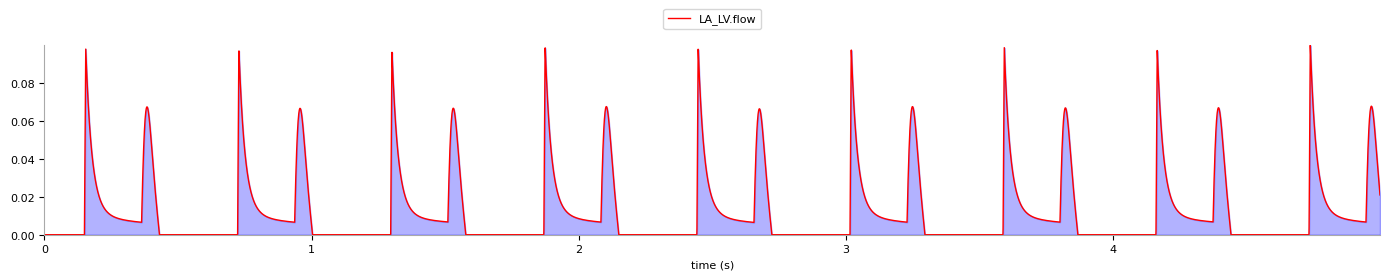

LA_LV.flow      : net  202.56179, forward  202.56179, backward        0.0 ml/kg/min, stroke volume:    2.10981 ml/kg, 


{'heartrate': 104.88659051669794,
 'spo2_pre': 95.93260074152698,
 'spo2_post': 95.37855011724008,
 'abp_systole': 64.51497,
 'abp_diastole': 36.98515,
 'pap_systole': 40.41127,
 'pap_diastole': 15.32706,
 'cvp': 2.964306485,
 'resp_rate': 42.29631689966175,
 'pH': 7.394236934337498,
 'po2': 9.862974357279814,
 'pco2': 5.735290319765337,
 'hco3': 25.98220277147745,
 'be': 0.5971379942718941}

In [1]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("definitions/normal_neonate.json")

# report the gas pressures in kPa
model.set_pressure_unit("kpa")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(False)
neo.pda(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.resuscitation(False)


# scale the baseline patient to a gestational age of 24 weeks
model._scaling.scale_to_gestational_age(40, True)


# stabilize the model by calculating 60 seconds
neo.calculate(60)

# get the validation data
neo.validate()
neo.plot_time_graph(
    ["LA_LV.flow"],
    sampleinterval=0.0005,
    time_to_calculate=5.0,
    weight_based=True,
)
neo.get_vitals()

In [ ]:
neo.validate()

<h5 style="color:red;">Model run results</h5>

In [ ]:
model._scaling.set_scale_factors(
    res_circ_factor=0.6,
    el_base_circ_factor=0.8,
    el_min_circ_factor=0.6,
    el_max_circ_factor=0.8,
    res_resp_factor=1.0,
    el_base_resp_factor=1.0,
    output=True,
)
neo.calculate(60)
neo.validate()
neo.get_vitals()

<h5 style="color:red;">Blood flows and volumes target data</h5>
<a href="https://pubmed.ncbi.nlm.nih.gov/20971721/">Groves AM, Chiesa G, Durighel G, Goldring ST, Fitzpatrick JA, Uribe S, Razavi R, Hajnal JV, Edwards AD. Functional cardiac MRI in preterm and term newborns. Arch Dis Child Fetal Neonatal Ed. 2011 Mar;96(2):F86-91. doi: 10.1136/adc.2010.189142. Epub 2010 Oct 21. PMID: 20971721; PMCID: PMC3093932.</a><br>
<img src="../documentation/images/GrovesFigure3.jpg" width="600" height="450"></img>
<img src="../documentation/images/GrovesFigure5.jpg" width="600" height="450"></img><br>
<!-- <img src="../documentation/images/GrovesTable1.jpg" width="300" height="100"></img>
<img src="../documentation/images/GrovesTable3.jpg" width="280" height="100"></img> -->

<h5 style="color:red;">Blood pressure target data</h5>


<a href="https://pubmed.ncbi.nlm.nih.gov/36858885/">van Zadelhoff AC, Poppe JA, Willemsen S, Mauff K, van Weteringen W, Goos TG, Reiss IKM, Vermeulen MJ, de Graaff JC. Age-dependent changes in arterial blood pressure in neonates during the first week of life: reference values and development of a model. Br J Anaesth. 2023 May;130(5):585-594. doi: 10.1016/j.bja.2023.01.024. Epub 2023 Feb 28. PMID: 36858885.</a><br><br>
<img src="../documentation/images/ZadelhoffSystolicFigure4.jpg" width="600" height="650"></img>
<img src="../documentation/images/ZadelhoffDiastolicFigure4.jpg" width="600" height="650"></img><br>